In [1]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

In [26]:
import urllib.request


url = "https://image.shutterstock.com/image-photo/india-circulating-coins-collection-set-260nw-201607448.jpg"
urllib.request.urlretrieve(url, "input.jpg")

('input.jpg', <http.client.HTTPMessage at 0x7ff0c20691d0>)

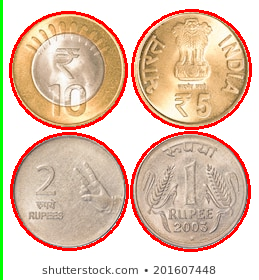

In [27]:
# load the image, clone it for output, and then convert it to grayscale
image = cv2.imread('input.jpg')
a,b,c = image.shape
output = image.copy()
lst = []


#Convert image into greyimage
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Adding Blur to the image
blur = cv2.blur(gray,(10,10))

#Finding circle using houghCircle algrorithms
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 100)

#Drawing Circle 
if circles is not None:
  circles = np.round(circles[0, :]).astype("int")
  for (x,y,r) in circles:
    cv2.circle(output, (x,y), r, (0,0,255), 2)
    rau = x-r-10 
    lst.append(rau)
    start_point = (rau, 0)
    end_point = (rau,a)
    #cv2.line(output, start_point, end_point, (0,255,0), 5)
  
  lst.sort() #sorting for finding most right circle value to draw line

  
  cv2.line(output,(lst[0], 0), (lst[0], a), (0,255,0), 4)
  
  cv2_imshow(output)


In [25]:
cv2.imwrite("output.jpg", output) 

True